<a href="https://colab.research.google.com/github/GrandMoff100/ML-collab-notebooks/blob/main/LatLongKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

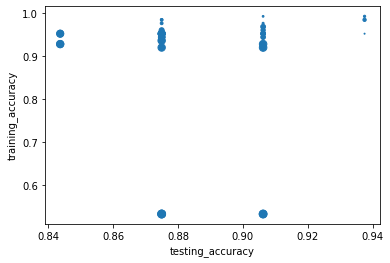

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd


# Latitude, Longitude, Minnesota vs Wisconsin
df = pd.read_csv("https://raw.githubusercontent.com/lynn0032/MLCamp2021/main/mystery_data.csv")

values_values = df[["value1", "value2"]].values
results_values = df["category"]


def k_model(neighbors):
    input_train, input_test, output_train, output_test = train_test_split(
        values_values,
        results_values,
        test_size=0.2,
        random_state=0  # Random seed integer
    )
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    scores = cross_val_score(
        knn,
        input_train,
        output_train,
        cv=StratifiedKFold(shuffle=True, random_state=1, n_splits=2),
        scoring='accuracy',
        n_jobs=-1
    )
    knn.fit(input_train, output_train)
    output_predict = knn.predict(input_test)
    ccm = confusion_matrix(output_test, output_predict)
    return accuracy_score(output_test, output_predict), scores.mean(), neighbors


k_list = list(range(1, 100))
score_df = pd.DataFrame(
    [k_model(k) for k in k_list],
    columns=["testing_accuracy", "training_accuracy", "k"]
)

score_df.plot.scatter(x="testing_accuracy", y="training_accuracy", s="k")

